<a href="https://colab.research.google.com/github/taerri/meal-kit-analysis/blob/main/04_%EB%B9%85%EC%B9%B4%EC%9D%B8%EC%A6%88_%EB%B0%80%ED%82%A4%ED%8A%B8_%EB%84%A4%ED%8A%B8%EC%9B%8C%ED%81%AC%EB%B6%84%EC%84%9D_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파일 읽기 및 단어 상위 200개 가져오기

In [ ]:
import pandas as pd
df=pd.read_csv('word_freq_remove.csv')

df200 = df.iloc[:200]
wordList=[]
for row in df200.itertuples(index=False):
    if row.word1!= row.word2:
        wordList.append((row.word1,row.word2))
wordList

[('밀키트', '시장'),
 ('밀키트', '제품'),
 ('가정', '간편식'),
 ('배송', '서비스'),
 ('새벽', '배송'),
 ('신선', '식품'),
 ('선물', '세트'),
 ('동기', '대비'),
 ('GS', '리테일'),
 ('밀키트', '상품'),
 ('밀키트', '브랜드'),
 ('사회', '거리'),
 ('손질', '식재료'),
 ('코로나19', '사태'),
 ('밀키트', '출시'),
 ('코로나19', '확산'),
 ('감염증', '신종'),
 ('신종', '코로나19'),
 ('간편식', '시장'),
 ('전문', '기업'),
 ('CJ', '제일제당'),
 ('온라인', '쇼핑몰'),
 ('밀키트', '매출'),
 ('대형', '마트'),
 ('정기', '배송'),
 ('배달', '서비스'),
 ('제품', '출시'),
 ('SSG', '닷컴'),
 ('매출', '증가'),
 ('시장', '규모'),
 ('서비스', '제공'),
 ('오프라인', '매장'),
 ('시장', '진출'),
 ('1인', '가구'),
 ('밀키트', '전문'),
 ('확대', '계획'),
 ('시장', '성장'),
 ('할인', '판매'),
 ('식재료', '양념'),
 ('프레시지', '밀키트'),
 ('밀키트', '판매'),
 ('온라인', '쇼핑'),
 ('요리', '밀키트'),
 ('온라', '인몰'),
 ('최대', '할인'),
 ('지원', '사업'),
 ('물류', '센터'),
 ('피코크', '밀키트'),
 ('업계', '관계자'),
 ('가정간', '편식'),
 ('행사', '진행'),
 ('대표', '메뉴'),
 ('상품', '판매'),
 ('메뉴', '밀키트'),
 ('수요', '증가'),
 ('구독', '서비스'),
 ('간편식', '밀키트'),
 ('할인', '행사'),
 ('구독', '경제'),
 ('할인', '최대'),
 ('이마트', '피코크'),
 ('온라인', '판매'),
 ('야쿠르트', '아줌마'),
 (

In [ ]:
uniqueWordList = df200.word1.unique()

폰트 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 50 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

{'밀키트': 0.049025405517031675, '가정': 0.002520523232757247, '배송': 0.013693846612109373, '새벽': 0.002520523232757247, '신선': 0.002520523232757247, '선물': 0.004663048713530654, '동기': 0.04554759834975398, 'GS': 0.002520523232757247, '사회': 0.004502400677683285, '손질': 0.010735061477315632, '코로나19': 0.010608681048308768, '감염증': 0.002520523232757247, '신종': 0.00359178597314395, '간편식': 0.008998950658627013, '전문': 0.004713899697080198, 'CJ': 0.002520523232757247, '온라인': 0.002520523232757247, '대형': 0.002520523232757247, '정기': 0.002520523232757247, '배달': 0.008541624961051372, '제품': 0.011665824440056746, 'SSG': 0.002520523232757247, '매출': 0.004713899697080198, '시장': 0.014346336261851726, '서비스': 0.012330779455460395, '오프라인': 0.002520523232757247, '1인': 0.002520523232757247, '확대': 0.006359027222298107, '할인': 0.0054507613421247905, '식재료': 0.00708324189195567, '프레시지': 0.007013684127589199, '요리': 0.004713899697080198, '온라': 0.002520523232757247, '최대': 0.0034471940555204543, '지원': 0.002520523232757247, '물류': 

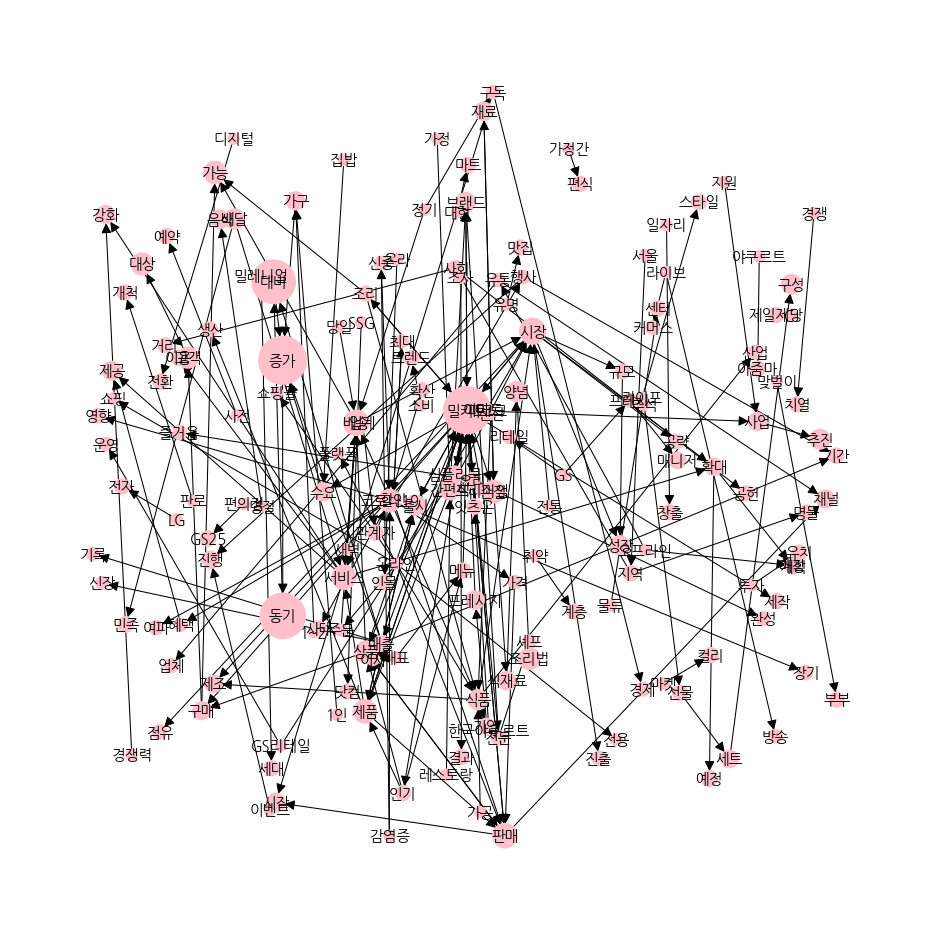

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np 
import matplotlib.font_manager as fm

a=nx.DiGraph()

node = uniqueWordList
a.add_nodes_from(node)

a.add_edges_from (wordList)
i = 0

font_location='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop=fm.FontProperties(fname=font_location,size=30).get_name()

pg=nx.pagerank(a,max_iter=100)
print(pg)

pos=nx.spring_layout(a)

#Push every node to the right so that coordinates are all positive
for node in a.nodes:
    pos[node]=[pos[node][0]+1000,pos[node][1]+1000]

#Check distances between nodes for number of iterations
for x in range(20):
    for nodex in a.nodes:
      for nodey in a.nodes:
          if(nodex != nodey):
              # if y distance is too small
              if(max(pos[nodex][1],pos[nodey][1])-min(pos[nodex][1],pos[nodey][1]) <0.6):
                  # check if also x distance is too small
                  if((max(pos[nodex][0],pos[nodey][0])-min(pos[nodex][0],pos[nodey][0])<0.3)):
                      #print(nodex,nodey)
                      if(pos[nodex][1] < pos[nodey][1]):
                          pos[nodex][1] = pos[nodex][1]-0.6
                          pos[nodey][1] = pos[nodey][1]+0.6
                      else:
                          pos[nodex][1] = pos[nodex][1]+0.6
                          pos[nodey][1] = pos[nodey][1]-0.6


plt.figure(figsize=(6,6), dpi=150, facecolor='w')
nx.draw(a,pos, node_color='pink',node_size=[v * 10000 for v in pg.values()], 
        with_labels = True, font_family=fontprop, edge_cmap=plt.cm.OrRd, font_size=7, width=0.5)    #pagerank 값에 10000을 곱하여 노드 크기 설정

plt.show()

원하는 단어만 뽑아보기

In [ ]:
result=[]
key=['배송','시장','제품','브랜드','코로나19','유통','트렌드']
for row in df200.itertuples(index=False):
    if row.word1 in key or row.word2 in key:
        result.append([row.word1,row.word2])
result=pd.DataFrame(result,columns=['word1','word2'])

In [ ]:
result.head()

,word1,word2
0,밀키트,시장
1,밀키트,제품
2,배송,서비스
3,새벽,배송
4,밀키트,브랜드


{'밀키트': 0.07035007316469294, '배송': 0.06646303521614852, '새벽': 0.011711436826882079, '코로나19': 0.041575945039209236, '신종': 0.011711436826882079, '간편식': 0.011711436826882079, '정기': 0.011711436826882079, '제품': 0.06413682176474059, '시장': 0.07867823392789965, '전통': 0.011711436826882079, '소비': 0.011711436826882079, '식품': 0.011711436826882079, '당일': 0.011711436826882079, '유통': 0.0216662728976578, '관계자': 0.011711436826882079, '오프라인': 0.011711436826882079, '주문': 0.011711436826882079, '온라인': 0.011711436826882079, '전문': 0.011711436826882079, '상품': 0.011711436826882079, '감염증': 0.011711436826882079, '인기': 0.011711436826882079, '출시': 0.02261553605615755, '브랜드': 0.04491495868148534, '서비스': 0.04144655719640828, '사태': 0.018779301570125567, '확산': 0.018779301570125567, '규모': 0.021265676731899923, '진출': 0.021265676731899923, '성장': 0.021265676731899923, '판매': 0.02261553605615755, '여파': 0.018779301570125567, '트렌드': 0.0216662728976578, '장기': 0.018779301570125567, '영향': 0.018779301570125567, '점유': 0.0212656767

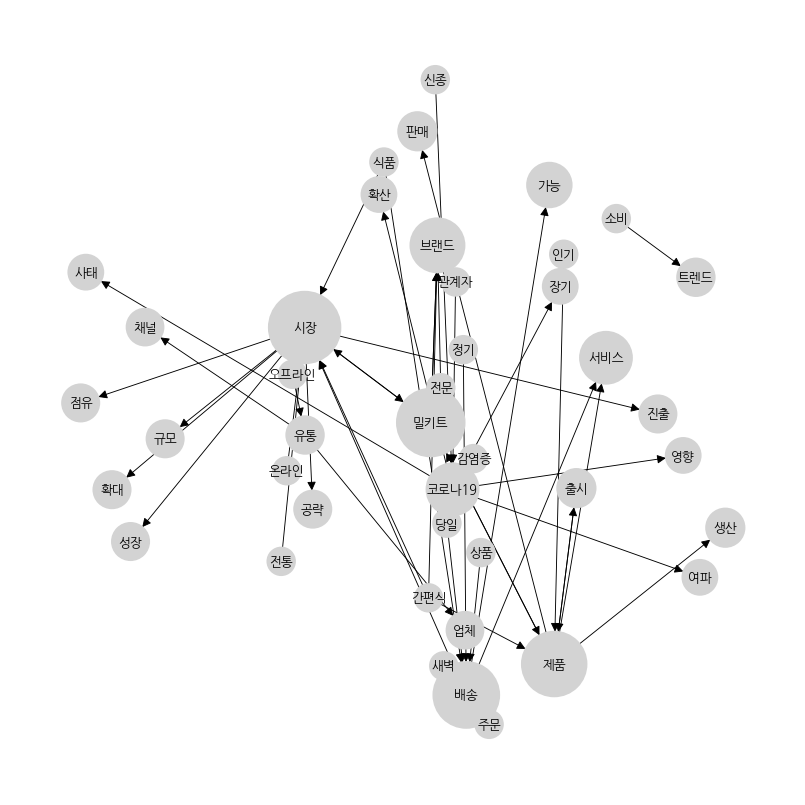

In [ ]:
uniqueWordList = result.word1.unique()
result2=[]
for row in result.itertuples(index=False):
    result2.append((row.word1,row.word2))


a=nx.DiGraph()

node = uniqueWordList
a.add_nodes_from(node)

a.add_edges_from (result2)
i = 0
# for name in node:
#     i = i+1
#     print(["%d:%s = %s"% (i,name,str(len(a.out_edges(name))))])

font_location='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop=fm.FontProperties(fname=font_location,size=30).get_name()

pg=nx.pagerank(a,max_iter=100)
print(pg)

pos=nx.spring_layout(a)

#Push every node to the right so that coordinates are all positive
for node in a.nodes:
    pos[node]=[pos[node][0]+1000,pos[node][1]+1000]

#Check distances between nodes for number of iterations
for x in range(20):
    for nodex in a.nodes:
      for nodey in a.nodes:
          if(nodex != nodey):
              # if y distance is too small
              if(max(pos[nodex][1],pos[nodey][1])-min(pos[nodex][1],pos[nodey][1]) <0.6):
                  # check if also x distance is too small
                  if((max(pos[nodex][0],pos[nodey][0])-min(pos[nodex][0],pos[nodey][0])<0.3)):
                      #print(nodex,nodey)
                      if(pos[nodex][1] < pos[nodey][1]):
                          pos[nodex][1] = pos[nodex][1]-0.6
                          pos[nodey][1] = pos[nodey][1]+0.6
                      else:
                          pos[nodex][1] = pos[nodex][1]+0.6
                          pos[nodey][1] = pos[nodey][1]-0.6


plt.figure(figsize=(6,6), dpi=130, facecolor='w')
nx.draw(a,pos=pos,node_color='lightgrey', node_size=[v * 20000 for v in pg.values()]
        ,with_labels = True, font_family=fontprop, edge_cmap=plt.cm.OrRd, font_size=7, width=0.5)

plt.show()

In [ ]:
new=pd.DataFrame.from_dict([pg])
df = new.transpose()
df.columns=['PageRank']
df.head()
df.to_csv('pagerank.csv',encoding='utf-8-sig')

*폰트 변경 시 폰트 경로 확인

In [ ]:
font_list=fm.findSystemFonts(fontpaths=None,fontext='ttf')
font_list[:10]

['/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf']